In [1]:
import SetProxPythonPath
from proxtoolbox.experiments.phase.Sparse_real_symm_Experiment import Sparse_real_symm_Experiment

Sparse2 = Sparse_real_symm_Experiment(algorithm='CDRl', TOL=5e-4)
Sparse2.run()
Sparse2.show()


FileNotFoundError: /home/rluke/git/ProxPython/demos/../InputData/Phase/symmetric_dots.csv not found.

In [ ]:
import SetProxPythonPath
from proxtoolbox.experiments.phase.phaseExperiment import PhaseExperiment
from proxtoolbox import proxoperators
from proxtoolbox.utils.loadMatFile import loadMatFile
import numpy as np
from numpy import fromfile, exp, nonzero, zeros, pi, resize, real, angle
from numpy.random import rand
from numpy.linalg import norm
from numpy.fft import fftshift, fft2, ifft2
from math import sqrt, ceil

import proxtoolbox.utils as utils
from proxtoolbox.utils.cell import Cell, isCell
from proxtoolbox.utils.gaussian import gaussian

#for downloading data
import proxtoolbox.utils.GetData as GetData
from proxtoolbox.utils.GetData import datadir

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show, figure
from PIL import Image


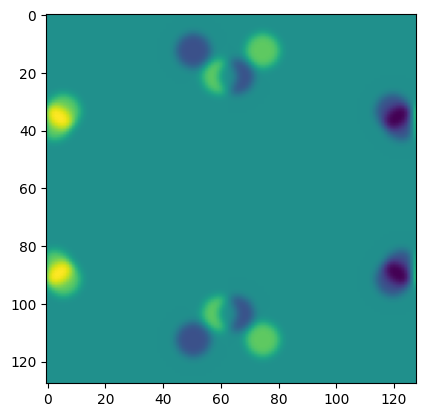

In [20]:
Ny=128 
Nx=128
n=128**2
rt_n = sqrt(n)
snr=20
Sparsity=.003 
cutoff=10
tmp = np.random.rand(n)
tmp2 = np.sort(tmp)[::-1] # descend sort
I = np.argsort(tmp)[::-1] 
support = np.zeros(n)
support[I[0:cutoff]] = np.ceil(tmp2[0:cutoff])
#####################################
# randomly generated pattern:
# truth = np.transpose(np.reshape(support*(100*rand(n)), (self.Ny, self.Nx)))
#####################################
#######################################
# pattern constructed from image file:
''' truth = Image.open('../InputData/Phase/pattern2.bmp')
truth = np.array(truth, dtype=np.float32) / 255.0
truth = truth[256-64:256+64,256-64:256+64]
antisymmetric across y-axis
symmetric accross x axis
truth = (truth - np.flip(truth,1))/2
truth = (truth + np.flip(truth,0))/2
support_idx = np.where(support != 0)[0]
tmp_shifted = np.roll(support_idx, -1)
tmp_shifted[len(tmp_shifted)-1] = support_idx[0]+n
g = gaussian(Ny, [Sparsity], [ceil(rt_n/2), ceil(rt_n/2)])
truth = np.real(fftshift(ifft2(fft2(g)*fft2(truth))))
flat_truth = truth.flatten('F')
u_scale = np.min(flat_truth[support_idx])
truth = truth / u_scale
support_idx = np.where(abs(truth) < 1)
truth[support_idx] = 0
'''
#######################################
###############################################
# symmetrized pattern read from csv file:
truth = np.genfromtxt('../InputData/Phase/symmetric_dots.csv', delimiter=',', dtype=np.float64)
# truth = fftshift(truth)
###############################################

plt.imshow(truth)